In [56]:
import numpy as np
import pandas as pd


In [57]:
breast_cancer = pd.read_csv('breast_cancer.csv')
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [58]:
# cleaning the dataset
breast_cancer.drop('id',axis=1,inplace=True)
breast_cancer.drop('Unnamed: 32',axis=1,inplace=True)

In [59]:
# Diagnosis (M = malignant, B = benign)
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1,'B':0})
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


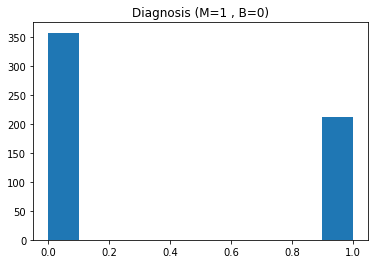

In [60]:
from matplotlib import pyplot as plt

#Explore data
breast_cancer.describe()
plt.hist(breast_cancer['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()


In [71]:
df = breast_cancer.iloc[:,1:31]
#normalozation
df = (df-np.std(df))/np.mean(df)

In [126]:
# df['target'] = breast_cancer['diagnosis']

X = df
y = breast_cancer['diagnosis']
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)
kmeans = KMeans(n_clusters=np.unique(y).size)

y_pred = kmeans.fit_predict(X_test)

In [127]:
accuracy = np.mean(y_test==y_pred)
f" Accuracy of prediction: {accuracy :.3f}"
# np.mean(y_test==1-y_pred)

' Accuracy of prediction: 0.904'

In [128]:
y_pred = pd.DataFrame(y_pred)
y_pred[1] = 1- breast_cancer['diagnosis']
y_pred.rename(columns={0:'predicted',1:'test_value'})

,predicted,test_value
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
109,0,1
110,1,1
111,0,1
112,0,1
